In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))

608


In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | rawson
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | skibbereen
Processing Record 9 of Set 1 | tigil
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | kutum
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | sakakah
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | atuona
Pro

Processing Record 38 of Set 4 | kaeng khoi
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | temir
Processing Record 41 of Set 4 | pastavy
Processing Record 42 of Set 4 | vila franca do campo
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | bandar-e lengeh
Processing Record 45 of Set 4 | marshall
Processing Record 46 of Set 4 | tambopata
Processing Record 47 of Set 4 | lolua
City not found. Skipping...
Processing Record 48 of Set 4 | honningsvag
Processing Record 49 of Set 4 | broome
Processing Record 50 of Set 4 | lazaro cardenas
Processing Record 1 of Set 5 | sydney
Processing Record 2 of Set 5 | taksimo
Processing Record 3 of Set 5 | port macquarie
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | lircay
Processing Record 8 of Set 5 | olinda
Processing Record 9 of Set 5 | husavik
Processing Record 10 of Set 5 | longyearbyen
Pro

Processing Record 29 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 30 of Set 8 | salamanca
Processing Record 31 of Set 8 | japura
Processing Record 32 of Set 8 | bereda
Processing Record 33 of Set 8 | oudtshoorn
Processing Record 34 of Set 8 | tilichiki
Processing Record 35 of Set 8 | kanye
Processing Record 36 of Set 8 | miranorte
City not found. Skipping...
Processing Record 37 of Set 8 | ossora
Processing Record 38 of Set 8 | volchansk
Processing Record 39 of Set 8 | morros
Processing Record 40 of Set 8 | karratha
Processing Record 41 of Set 8 | dong hoi
Processing Record 42 of Set 8 | moussoro
Processing Record 43 of Set 8 | hovd
Processing Record 44 of Set 8 | klokkarvik
City not found. Skipping...
Processing Record 45 of Set 8 | pietersburg
Processing Record 46 of Set 8 | natal
Processing Record 47 of Set 8 | moyale
Processing Record 48 of Set 8 | la asuncion
Processing Record 49 of Set 8 | san andres
Processing Record 50 of Set 8 | dzhebariki-khaya
Processi

Processing Record 15 of Set 12 | santarem
Processing Record 16 of Set 12 | zastron
Processing Record 17 of Set 12 | ovalle
Processing Record 18 of Set 12 | mataiea
City not found. Skipping...
Processing Record 19 of Set 12 | kawalu
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | shenkursk
Processing Record 22 of Set 12 | micheweni
Processing Record 23 of Set 12 | dunmore
Processing Record 24 of Set 12 | rensvik
Processing Record 25 of Set 12 | quatis
Processing Record 26 of Set 12 | gat
Processing Record 27 of Set 12 | ghanzi
Processing Record 28 of Set 12 | kizema
Processing Record 29 of Set 12 | katsuura
Processing Record 30 of Set 12 | filadelfia
Processing Record 31 of Set 12 | komsomolskoye
Processing Record 32 of Set 12 | boa vista
Processing Record 33 of Set 12 | roald
Processing Record 34 of Set 12 | saint-francois
Processing Record 35 of Set 12 | nome
Processing Record 36 of Set 12 | srikakulam
Processing Record 37 of Set 12 | houma
Processing Reco

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.06,49,40,0.00,AR,2021-09-26 20:28:13
1,Thompson,55.7435,-97.8558,62.76,51,40,9.22,CA,2021-09-26 20:27:22
2,Port Elizabeth,-33.9180,25.5701,63.10,100,90,10.36,ZA,2021-09-26 20:28:44
3,Rawson,-43.3002,-65.1023,57.49,22,3,15.03,AR,2021-09-26 20:28:44
4,Cape Town,-33.9258,18.4232,61.21,82,0,1.99,ZA,2021-09-26 20:26:19
5,Georgetown,5.4112,100.3354,76.95,94,40,1.01,MY,2021-09-26 20:26:42
6,Provideniya,64.3833,-173.3000,37.51,81,75,8.95,RU,2021-09-26 20:28:44
7,Skibbereen,51.5500,-9.2667,53.40,68,100,7.85,IE,2021-09-26 20:28:45
8,Tigil,57.8000,158.6667,43.36,86,100,1.30,RU,2021-09-26 20:28:45
9,Tasiilaq,65.6145,-37.6368,35.76,69,23,1.92,GL,2021-09-26 20:28:14


In [11]:
reorder_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-09-26 20:28:13,-54.8000,-68.3000,46.06,49,40,0.00
1,Thompson,CA,2021-09-26 20:27:22,55.7435,-97.8558,62.76,51,40,9.22
2,Port Elizabeth,ZA,2021-09-26 20:28:44,-33.9180,25.5701,63.10,100,90,10.36
3,Rawson,AR,2021-09-26 20:28:44,-43.3002,-65.1023,57.49,22,3,15.03
4,Cape Town,ZA,2021-09-26 20:26:19,-33.9258,18.4232,61.21,82,0,1.99
5,Georgetown,MY,2021-09-26 20:26:42,5.4112,100.3354,76.95,94,40,1.01
6,Provideniya,RU,2021-09-26 20:28:44,64.3833,-173.3000,37.51,81,75,8.95
7,Skibbereen,IE,2021-09-26 20:28:45,51.5500,-9.2667,53.40,68,100,7.85
8,Tigil,RU,2021-09-26 20:28:45,57.8000,158.6667,43.36,86,100,1.30
9,Tasiilaq,GL,2021-09-26 20:28:14,65.6145,-37.6368,35.76,69,23,1.92


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

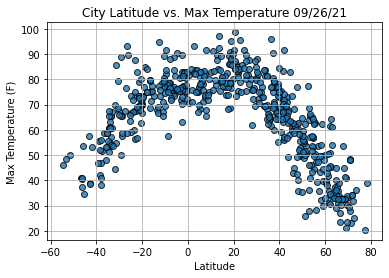

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

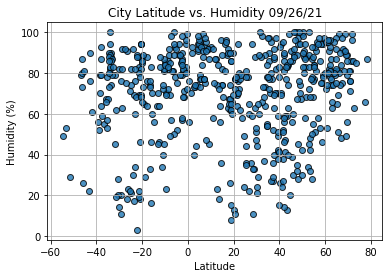

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

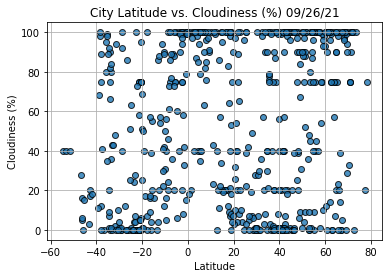

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

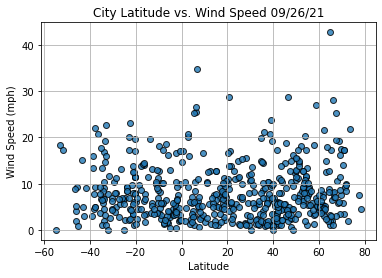

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [20]:
index13 = city_data_df.loc[13]
index13

City                Alice Springs
Country                        AU
Date          2021-09-26 20:24:32
Lat                         -23.7
Lng                      133.8833
Max Temp                    67.55
Humidity                       17
Cloudiness                      4
Wind Speed                   9.22
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
551     True
552     True
553    False
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2021-09-26 20:27:22,55.7435,-97.8558,62.76,51,40,9.22
5,Georgetown,MY,2021-09-26 20:26:42,5.4112,100.3354,76.95,94,40,1.01
6,Provideniya,RU,2021-09-26 20:28:44,64.3833,-173.3000,37.51,81,75,8.95
7,Skibbereen,IE,2021-09-26 20:28:45,51.5500,-9.2667,53.40,68,100,7.85
8,Tigil,RU,2021-09-26 20:28:45,57.8000,158.6667,43.36,86,100,1.30


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2021-09-26 20:27:22,55.7435,-97.8558,62.76,51,40,9.22
5,Georgetown,MY,2021-09-26 20:26:42,5.4112,100.3354,76.95,94,40,1.01
6,Provideniya,RU,2021-09-26 20:28:44,64.3833,-173.3000,37.51,81,75,8.95
7,Skibbereen,IE,2021-09-26 20:28:45,51.5500,-9.2667,53.40,68,100,7.85
8,Tigil,RU,2021-09-26 20:28:45,57.8000,158.6667,43.36,86,100,1.30
9,Tasiilaq,GL,2021-09-26 20:28:14,65.6145,-37.6368,35.76,69,23,1.92
10,Kapaa,US,2021-09-26 20:28:45,22.0752,-159.3190,82.38,76,75,5.01
11,Ostrovnoy,RU,2021-09-26 20:28:46,68.0531,39.5131,44.91,91,97,10.67
12,Kutum,SD,2021-09-26 20:28:46,14.2000,24.6667,75.54,56,57,7.63
15,Norman Wells,CA,2021-09-26 20:28:30,65.2820,-126.8329,37.44,65,75,17.27


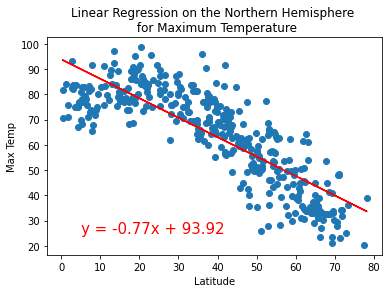

In [86]:
# Linear regression on the Northern Hemisphere -- Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (5,25))

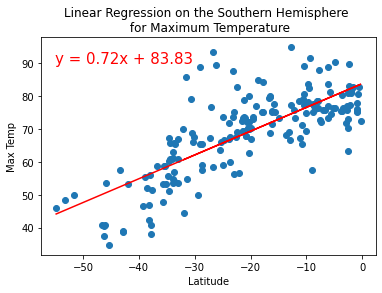

In [85]:
# Linear regression on the Southern Hemisphere -- Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                        'Max Temp', (-55,90))

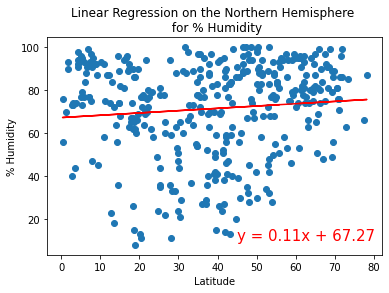

In [63]:
# Linear regression on the Northern Hemisphere -- Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (45,10))

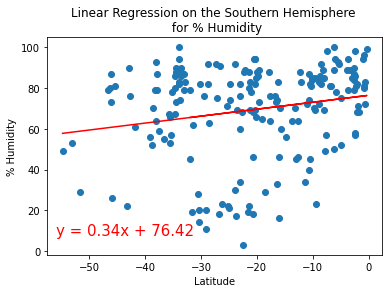

In [64]:
# Linear regression on the Southern Hemisphere -- Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-56,8))

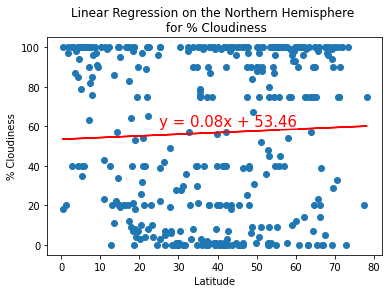

In [71]:
# Linear regression on the Northern Hemisphere -- Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (25,60))

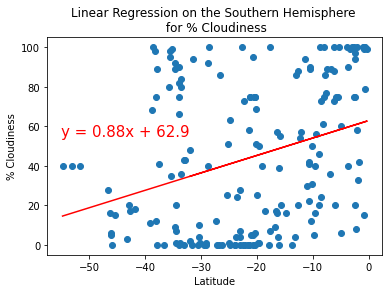

In [74]:
# Linear regression on the Southern Hemisphere -- Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-55,55))

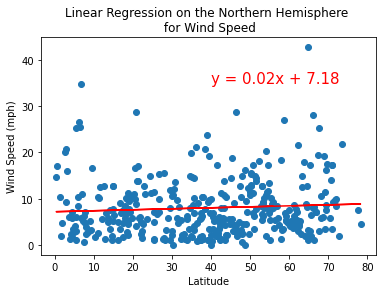

In [81]:
# Linear regression on the Northern Hemisphere -- Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (40,35))

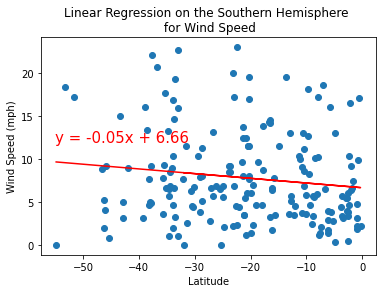

In [90]:
# Linear regression on the Southern Hemisphere -- Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (-55,12))